# Bike share problem analysis 

### Note: when choose data file be sure that the file has all features we have used:
##### ride_id,  	rideable_type,  	started_at	ended_at,   	start_station_name, 	start_station_id,   	end_station_name,   	end_station_id,   	start_lat,  	start_lng,	 end_lat,	 end_lng,	  member_casual

#### use "202008-capitalbikeshare-tripdata.csv" for example
#### data is available here : https://s3.amazonaws.com/capitalbikeshare-data/index.html

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import pylab
import calendar
from datetime import datetime
import warnings
from scipy import stats
import seaborn as sn
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
warnings.filterwarnings("ignore", category=DeprecationWarning)
import math

# import models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# for evaluoations purposes
from sklearn import model_selection

In [91]:
# read bikes data
data_file_path = './202008-capitalbikeshare-tripdata.csv'
bikes_data = pd.read_csv(data_file_path)

In [92]:
#shape of the data set
bikes_data.shape

(251603, 13)

In [93]:
bikes_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,95D0E56BC37512F2,docked_bike,2020-08-26 20:07:36,2020-08-26 20:36:16,Army Navy Dr & S Joyce St,31006.0,N Lynn St & Fairfax Dr,31917.0,38.863700,-77.063300,38.893860,-77.070862,member
1,787142FE24DA497D,docked_bike,2020-08-02 17:54:57,2020-08-02 18:12:36,22nd & P ST NW,31285.0,14th & Upshur St NW,31406.0,38.909394,-77.048728,38.942475,-77.032678,member
2,BE6C2BFB2C0A6CD6,docked_bike,2020-08-11 18:55:15,2020-08-11 19:16:30,Prince George's Plaza Metro,32420.0,Queens Chapel & Hamilton St,32410.0,38.965742,-76.954803,38.954600,-76.959500,casual
3,7EEF58C1346E290C,docked_bike,2020-08-01 13:51:47,2020-08-01 14:09:52,Rhode Island & Connecticut Ave NW,31239.0,11th & Park Rd NW,31651.0,38.905995,-77.039802,38.931322,-77.028247,casual
4,61DE8A9F22D88C38,docked_bike,2020-08-21 19:31:56,2020-08-21 19:49:17,Market Square / King St & Royal St,31042.0,King St & Patrick St,31044.0,38.804718,-77.043363,38.805317,-77.049883,member


In [94]:
# statistical info
bikes_data.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,235723.000000,233320.000000,251596.000000,251596.000000,250638.000000,250638.000000
mean,31364.144742,31365.533088,38.904361,-77.033363,38.903426,-77.032943
std,272.468283,272.247975,0.031245,0.034985,0.031142,0.034868
min,31000.000000,31000.000000,38.782633,-77.368416,38.710000,-77.420000
25%,31202.000000,31203.000000,38.890000,-77.046587,38.889955,-77.046570
50%,31273.000000,31273.000000,38.903584,-77.032224,38.902760,-77.032096
75%,31603.000000,31603.000000,38.917200,-77.016005,38.915477,-77.015900
max,32902.000000,32902.000000,39.125828,-76.825535,39.270000,-76.630000


In [95]:
# data type info 
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251603 entries, 0 to 251602
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             251603 non-null  object 
 1   rideable_type       251603 non-null  object 
 2   started_at          251603 non-null  object 
 3   ended_at            251603 non-null  object 
 4   start_station_name  235723 non-null  object 
 5   start_station_id    235723 non-null  float64
 6   end_station_name    233320 non-null  object 
 7   end_station_id      233320 non-null  float64
 8   start_lat           251596 non-null  float64
 9   start_lng           251596 non-null  float64
 10  end_lat             250638 non-null  float64
 11  end_lng             250638 non-null  float64
 12  member_casual       251603 non-null  object 
dtypes: float64(6), object(7)
memory usage: 25.0+ MB


In [96]:
# unique values
bikes_data.apply(lambda x: len(x.unique()))

ride_id               251603
rideable_type              2
started_at            232493
ended_at              231352
start_station_name       606
start_station_id         605
end_station_name         609
end_station_id           607
start_lat              31014
start_lng              31365
end_lat                30410
end_lng                30670
member_casual              2
dtype: int64

# Preorocessing bikes dataset

In [97]:
# check for null values
bikes_data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    15880
start_station_id      15880
end_station_name      18283
end_station_id        18283
start_lat                 7
start_lng                 7
end_lat                 965
end_lng                 965
member_casual             0
dtype: int64

In [98]:
#Drop out the missing data
bikes_data = bikes_data.dropna()

In [99]:
# unique values

bikes_data.apply(lambda x: len(x.unique()))

ride_id               227488
rideable_type              2
started_at            211605
ended_at              210332
start_station_name       604
start_station_id         603
end_station_name         607
end_station_id           605
start_lat              25029
start_lng              25200
end_lat                25394
end_lng                25567
member_casual              2
dtype: int64

# Exploratory Data Analysis

In [100]:
#Extracting useful featurs from "started_at" column
bikes_data["started_at_date"] = bikes_data.started_at.apply(lambda x : x.split()[0])
bikes_data["started_at_day"] = bikes_data.started_at.apply(lambda x : x.split()[0].split("-")[2])
bikes_data["started_at_hour"] = bikes_data.started_at.apply(lambda x : x.split()[1].split(":")[0])
bikes_data["started_at_minute"] = bikes_data.started_at.apply(lambda x : x.split()[1].split(":")[1])


In [101]:
#Extracting useful featurs from "ended_at" column
bikes_data["ended_at_date"] = bikes_data.ended_at.apply(lambda x : x.split()[0])
bikes_data["ended_at_day"] = bikes_data.ended_at.apply(lambda x : x.split()[0].split("-")[2])
bikes_data["ended_at_hour"] = bikes_data.ended_at.apply(lambda x : x.split()[1].split(":")[0])
bikes_data["ended_at_minute"] = bikes_data.ended_at.apply(lambda x : x.split()[1].split(":")[1])


In [102]:
bikes_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,started_at_day,started_at_hour,started_at_minute,ended_at_date,ended_at_day,ended_at_hour,ended_at_minute
0,95D0E56BC37512F2,docked_bike,2020-08-26 20:07:36,2020-08-26 20:36:16,Army Navy Dr & S Joyce St,31006.0,N Lynn St & Fairfax Dr,31917.0,38.863700,-77.063300,38.893860,-77.070862,member,2020-08-26,26,20,07,2020-08-26,26,20,36
1,787142FE24DA497D,docked_bike,2020-08-02 17:54:57,2020-08-02 18:12:36,22nd & P ST NW,31285.0,14th & Upshur St NW,31406.0,38.909394,-77.048728,38.942475,-77.032678,member,2020-08-02,02,17,54,2020-08-02,02,18,12
2,BE6C2BFB2C0A6CD6,docked_bike,2020-08-11 18:55:15,2020-08-11 19:16:30,Prince George's Plaza Metro,32420.0,Queens Chapel & Hamilton St,32410.0,38.965742,-76.954803,38.954600,-76.959500,casual,2020-08-11,11,18,55,2020-08-11,11,19,16
3,7EEF58C1346E290C,docked_bike,2020-08-01 13:51:47,2020-08-01 14:09:52,Rhode Island & Connecticut Ave NW,31239.0,11th & Park Rd NW,31651.0,38.905995,-77.039802,38.931322,-77.028247,casual,2020-08-01,01,13,51,2020-08-01,01,14,09
4,61DE8A9F22D88C38,docked_bike,2020-08-21 19:31:56,2020-08-21 19:49:17,Market Square / King St & Royal St,31042.0,King St & Patrick St,31044.0,38.804718,-77.043363,38.805317,-77.049883,member,2020-08-21,21,19,31,2020-08-21,21,19,49


In [103]:
bikes_data = bikes_data.drop(["ride_id", "rideable_type", "started_at", "ended_at", "start_station_name", "end_station_name", "member_casual","started_at_date","ended_at_date","started_at_minute","ended_at_minute"], axis=1)

In [104]:
# make all data integer 
bikes_data['started_at_day'] = bikes_data['started_at_day'].astype(int)
bikes_data['started_at_hour'] = bikes_data['started_at_hour'].astype(int)
bikes_data['ended_at_day'] = bikes_data['ended_at_day'].astype(int)
bikes_data['ended_at_hour'] = bikes_data['ended_at_hour'].astype(int)

In [105]:
bikes_data.dtypes

start_station_id    float64
end_station_id      float64
start_lat           float64
start_lng           float64
end_lat             float64
end_lng             float64
started_at_day        int32
started_at_hour       int32
ended_at_day          int32
ended_at_hour         int32
dtype: object

In [106]:
# grouping and counting number of bikes each hour
my_training_dataframe_later = bikes_data
bikes_data = bikes_data.groupby(["started_at_day", "started_at_hour", "start_station_id"]).count()


In [107]:
# replace one columns name such 'end_station_id' to 'number_of_bikes'
bikes_data.rename(columns={'end_station_id': 'number_of_bikes'}, inplace=True)

In [108]:
bikes_data.max()

number_of_bikes    45
start_lat          45
start_lng          45
end_lat            45
end_lng            45
ended_at_day       45
ended_at_hour      45
dtype: int64

In [109]:
# this output file to hold data after grouping and counting
output_file = './output_file.csv'

In [110]:
# writing on output file 
bikes_data.to_csv(output_file) 

In [111]:
# read output bikes data
output_df = pd.read_csv(output_file)
output_df = output_df.drop(['start_lat','start_lng','end_lat','end_lng','ended_at_day','ended_at_hour'], axis=1)
output_df

,started_at_day,started_at_hour,start_station_id,number_of_bikes
0,1,0,31020.0,2
1,1,0,31024.0,2
2,1,0,31088.0,2
3,1,0,31092.0,1
4,1,0,31100.0,1
...,...,...,...,...
104226,31,23,31622.0,1
104227,31,23,31812.0,1
104228,31,23,31928.0,1
104229,31,23,32034.0,1


# Preprocessing data in output_df dataframe

In [112]:
# ==> hour range drom 0->23 to 1->24
output_df['started_at_hour'] += 1
# ==> day range drom 1->30 to 0->29
# day one hour zero = 1
output_df['started_at_day'] -=  1

## Date before ...

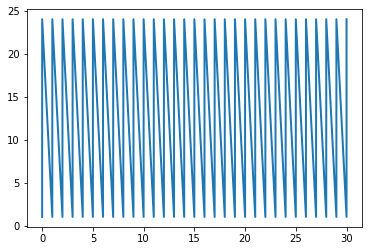

In [113]:
x_day = output_df['started_at_day']
y_hour = output_df['started_at_hour']
plt.plot(x_day, y_hour,linewidth=2, markersize=1)

In [114]:
output_df['m_date'] = output_df['started_at_day']*24 + output_df['started_at_hour']
# this file will be used in training models
output_df.to_csv(output_file) 
output_df

,started_at_day,started_at_hour,start_station_id,number_of_bikes,m_date
0,0,1,31020.0,2,1
1,0,1,31024.0,2,1
2,0,1,31088.0,2,1
3,0,1,31092.0,1,1
4,0,1,31100.0,1,1
...,...,...,...,...,...
104226,30,24,31622.0,1,744
104227,30,24,31812.0,1,744
104228,30,24,31928.0,1,744
104229,30,24,32034.0,1,744


In [115]:
# initialization dictionary
stations_dictionary = {}
for index, row in output_df.iterrows():
    key = row["start_station_id"]
    stations_dictionary[key] = []

for index, row in output_df.iterrows():
    key = row["start_station_id"]
    stations_dictionary[key].append([row["m_date"],row["number_of_bikes"]]) 
# example
stations_dictionary[31020.0]

[[1.0, 2.0],
 [12.0, 2.0],
 [18.0, 1.0],
 [19.0, 1.0],
 [21.0, 2.0],
 [22.0, 4.0],
 [23.0, 1.0],
 [36.0, 1.0],
 [37.0, 1.0],
 [38.0, 3.0],
 [41.0, 1.0],
 [42.0, 1.0],
 [55.0, 1.0],
 [62.0, 1.0],
 [84.0, 1.0],
 [87.0, 2.0],
 [88.0, 1.0],
 [91.0, 1.0],
 [94.0, 1.0],
 [95.0, 1.0],
 [102.0, 1.0],
 [103.0, 1.0],
 [104.0, 1.0],
 [108.0, 1.0],
 [114.0, 1.0],
 [115.0, 1.0],
 [120.0, 1.0],
 [128.0, 1.0],
 [129.0, 1.0],
 [138.0, 1.0],
 [139.0, 1.0],
 [140.0, 1.0],
 [142.0, 1.0],
 [158.0, 2.0],
 [163.0, 1.0],
 [164.0, 1.0],
 [166.0, 2.0],
 [169.0, 1.0],
 [177.0, 1.0],
 [179.0, 1.0],
 [181.0, 1.0],
 [182.0, 1.0],
 [185.0, 1.0],
 [186.0, 1.0],
 [187.0, 2.0],
 [189.0, 1.0],
 [203.0, 1.0],
 [206.0, 2.0],
 [207.0, 1.0],
 [230.0, 2.0],
 [231.0, 2.0],
 [233.0, 1.0],
 [248.0, 1.0],
 [254.0, 1.0],
 [279.0, 1.0],
 [281.0, 1.0],
 [282.0, 2.0],
 [283.0, 5.0],
 [306.0, 1.0],
 [307.0, 1.0],
 [308.0, 3.0],
 [310.0, 1.0],
 [322.0, 1.0],
 [324.0, 3.0],
 [325.0, 1.0],
 [331.0, 2.0],
 [345.0, 3.0],
 [347.0, 2.0],
 

In [116]:
# comulative sum for number of bikes idea, for each station
for key in stations_dictionary:
    station_list = stations_dictionary[key] # [[1, 1], [2,1], [3, 1]]
    pre = station_list[0][1] # 1
    for item in station_list[1:]: # item = [2, 2]
        item[1] = item[1] + pre
        pre = item[1]
# example
stations_dictionary[31020.0]

[[1.0, 2.0],
 [12.0, 4.0],
 [18.0, 5.0],
 [19.0, 6.0],
 [21.0, 8.0],
 [22.0, 12.0],
 [23.0, 13.0],
 [36.0, 14.0],
 [37.0, 15.0],
 [38.0, 18.0],
 [41.0, 19.0],
 [42.0, 20.0],
 [55.0, 21.0],
 [62.0, 22.0],
 [84.0, 23.0],
 [87.0, 25.0],
 [88.0, 26.0],
 [91.0, 27.0],
 [94.0, 28.0],
 [95.0, 29.0],
 [102.0, 30.0],
 [103.0, 31.0],
 [104.0, 32.0],
 [108.0, 33.0],
 [114.0, 34.0],
 [115.0, 35.0],
 [120.0, 36.0],
 [128.0, 37.0],
 [129.0, 38.0],
 [138.0, 39.0],
 [139.0, 40.0],
 [140.0, 41.0],
 [142.0, 42.0],
 [158.0, 44.0],
 [163.0, 45.0],
 [164.0, 46.0],
 [166.0, 48.0],
 [169.0, 49.0],
 [177.0, 50.0],
 [179.0, 51.0],
 [181.0, 52.0],
 [182.0, 53.0],
 [185.0, 54.0],
 [186.0, 55.0],
 [187.0, 57.0],
 [189.0, 58.0],
 [203.0, 59.0],
 [206.0, 61.0],
 [207.0, 62.0],
 [230.0, 64.0],
 [231.0, 66.0],
 [233.0, 67.0],
 [248.0, 68.0],
 [254.0, 69.0],
 [279.0, 70.0],
 [281.0, 71.0],
 [282.0, 73.0],
 [283.0, 78.0],
 [306.0, 79.0],
 [307.0, 80.0],
 [308.0, 83.0],
 [310.0, 84.0],
 [322.0, 85.0],
 [324.0, 88.0],
 [

In [117]:
# collect all stations
stations =[]
for key in stations_dictionary:
    stations.append(key)

# Definition of the models

In [118]:
# Neural network regressor model (MLP)
number_of_neurons = 3
mlpreg = MLPRegressor(hidden_layer_sizes=(number_of_neurons,number_of_neurons+2),
                      activation="identity",
                      solver='lbfgs',
                      max_iter=8000,)

In [119]:
# linear regression model
lrreg = LinearRegression()

In [120]:
# RandomForest Regressor model
rfreg = RandomForestRegressor()

# Evaluation functions

In [121]:
# get the accurecy score using score function in each model 
def get_score(model,X_train, X_test, y_train, y_test):
    print(f'{model} train score : {model.score(X_train,y_train)*100.0} % ')
    print(f'{model} test score : {model.score(X_test,y_test)*100.0} % ')

In [122]:
# cross validation 
from sklearn.model_selection import cross_val_score, KFold
def cross_validation(model,X,y):
    kf = KFold(n_splits = 3)
    pred = cross_val_score(model, X,y, cv=kf,scoring='r2')
    print('Model:', model)
    print('CV score:',pred)

# Fit, recieve user input, and get report

In [123]:
#!pip install MultiChoice

In [124]:
# options in MultiChoice library just recive string
for i in range(len(stations)):
    stations[i]=str(stations[i])

### Most important cell ...

What the station you need?
You must choose one of the following:
1. 31020.0
2. 31024.0
3. 31088.0
4. 31092.0
5. 31100.0
6. 31101.0
7. 31102.0
8. 31103.0
9. 31109.0
10. 31110.0
11. 31111.0
12. 31113.0
13. 31114.0
14. 31116.0
15. 31119.0
16. 31124.0
17. 31125.0
18. 31130.0
19. 31131.0
20. 31200.0
21. 31201.0
22. 31202.0
23. 31203.0
24. 31204.0
25. 31207.0
26. 31209.0
27. 31216.0
28. 31239.0
29. 31245.0
30. 31246.0
31. 31247.0
32. 31251.0
33. 31257.0
34. 31260.0
35. 31265.0
36. 31266.0
37. 31274.0
38. 31282.0
39. 31285.0
40. 31288.0
41. 31289.0
42. 31295.0
43. 31306.0
44. 31307.0
45. 31315.0
46. 31323.0
47. 31324.0
48. 31401.0
49. 31415.0
50. 31506.0
51. 31508.0
52. 31509.0
53. 31516.0
54. 31603.0
55. 31609.0
56. 31611.0
57. 31613.0
58. 31616.0
59. 31619.0
60. 31628.0
61. 31629.0
62. 31639.0
63. 31640.0
64. 31641.0
65. 31646.0
66. 31649.0
67. 31650.0
68. 31651.0
69. 31652.0
70. 31653.0
71. 31661.0
72. 31703.0
73. 31800.0
74. 32056.0
75. 32412.0
76. 31041.0
77. 31115.0
78. 31121.0
79. 3112

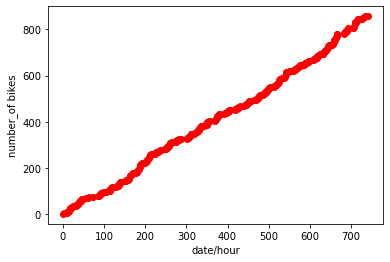

What the model you need to train?
You must choose one of the following:
1. Linearregression
2. Mlp
3. Randomforest
>>> 2
Mlp
Enter the day you need : 6
Enter the hour you need : 8
we guess the number of bikes in day 6 at hour between 7 and 8 = 2


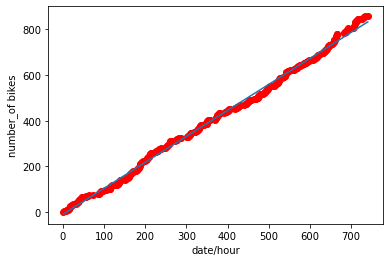

MLPRegressor(activation='identity', hidden_layer_sizes=(3, 5), max_iter=8000,
             solver='lbfgs') train score : 99.6080487445918 % 
MLPRegressor(activation='identity', hidden_layer_sizes=(3, 5), max_iter=8000,
             solver='lbfgs') test score : 99.66393083766457 % 
Model: MLPRegressor(activation='identity', hidden_layer_sizes=(3, 5), max_iter=8000,
             solver='lbfgs')
CV score: [0.94423639 0.95002771 0.8955487 ]
Do you want to continue?
You must choose one of the following:
1. Yes
2. No
>>> 2
No


In [125]:
from MultiChoice import MultiChoice
from IPython.display import clear_output
from sklearn.model_selection import train_test_split

answer = True

while answer:
    #------------------------------------- user input ----------------------#
    question1 = MultiChoice(
        "What the station you need?\n"
        "You must choose one of the following:",
        options=stations,
    )
    station = question1()
    print(station)
    #------------------------------------- user input ----------------------#
    
    #-------------------- prepare data for station choosen -----------------#
    # Sample "station" comes from user: test comulative sum mehode for one station
    X = []
    y = []

    station_id = float(station)
    for item in stations_dictionary[station_id]:
        X.append(item[0])
        y.append(item[1])
    X = np.array(X).reshape(-1, 1)
    y = np.array(y)
    #-------------------- prepare data for station choosen -----------------#
    
    #------------------------- plot the data --------------------------------#
    print(f'actual data in station {station}')
    fig, ax = plt.subplots()
    ax.scatter(X, y,color="red")
    plt.xlabel("date/hour")
    plt.ylabel("number_of bikes")
    plt.show()
    #------------------------- plot the data --------------------------------#
    
    #------------------------- user choose model-----------------------------#
    question2 = MultiChoice(
        "What the model you need to train?\n"
        "You must choose one of the following:",
        options=("Linearregression","MLP","Randomforest"), # 0:Linear regression, 1:MLP, 2:Randomforest
    )
    model_selecrion = str(question2())
    print(model_selecrion)

    model = mlpreg
    if model_selecrion == "Linearregression":
        model = lrreg
    elif model_selecrion == "Mlp":
        model = mlpreg
    elif model_selecrion == "Randomforest":
        model = rfreg
    #------------------------- user choose model-----------------------------#
    
    
    #--------------------- model fit ----------------------------------------#
    model = model.fit(X,y)
    #--------------------- model fit ----------------------------------------#
    
    
    #------------------------------------- user input ----------------------#
    day_input = int(input("Enter the day you need : "))
    hour_input = int(input("Enter the hour you need : "))
    current_pridiction_time = day_input*24+hour_input
    previous_pridiction_time = day_input*24+(hour_input-1)
    #------------------------------------- user input ----------------------#
    
    
    #------------------------- pridiction-----------------------------------#
    y_pred = model.predict([[current_pridiction_time]])
    y_pred_previous = model.predict([[previous_pridiction_time]])
    result = y_pred-y_pred_previous
    if result<0 or y_pred<0 or y_pred_previous<0:
        exit("something wrong in prediction")
    else:
        print(f'we guess the number of bikes in day {day_input} at hour between {hour_input-1} and {hour_input} = {math.ceil(result)}')
    #------------------------- pridiction-----------------------------------#     
    
    
        
    # ----------------- plot the regression line with data ------------------#        
    y_predict = model.predict(X)
    fig, ax = plt.subplots()
    plt.xlabel("date/hour")
    plt.ylabel("number_of bikes")
    ax.scatter(X, y,color="red")
    ax.plot(X, y_predict)
    plt.show()
    # ----------------- plot the regression line with data ------------------#      
    
    
    #--------------------- evaluotion-------------------------------------#
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) 
    get_score(model,X_train, X_test, y_train, y_test)
    cross_validation(model,X,y)  
    #--------------------- evaluation-------------------------------------#
 

    #----------------repeate the process ---------------------------------#
    question3 = MultiChoice(
        "Do you want to continue?\n"
        "You must choose one of the following:",
        options=("yes","no"), 
    )
    answer3 = str(question3())
    print(answer3)
    if answer3=="No":
        answer = False
    elif answer3=="Yes":
        clear_output(wait=False)
    #----------------repeate the process ---------------------------------#
